![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Mobile Phone Detection in an Image

## Domain
Mobile Phones, Computer Vision

## Business Context
The ability to process visual information using machine learning algorithms can be very useful. Electronics companies can use it to identify the presence of a mobile in an image (location), mobile brand just by looking at the image, and minor damages if there are any. The computer vision field has multiple applications and based on the available data it can be used to meet business objectives.
Here, we will use a simple convolutional neural network to classify images with and without mobile phones. 
 
## Objective

Given the images and label whether an image has a mobile phone or not, can you train a model that allows you to map and find the presence of mobile phones within the selected images.


### Package version
- tensorflow==2.3.0
- matplotlib==3.2.1
- h5py==2.10.0
- google==2.0.3

## Table of Content

1. Import Libraries

2. Setting options

3. Data loading and Data Analysis 

4. Visualize and Standardize the data

5. Model Building

6. Evaluate Model

7. Conclusion and Interpretation

## 1. Import Libraries

Let us start by mounting the drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Let us check for the version of installed tensorflow.

In [2]:
# used to supress display of warnings
import warnings
 
# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os
 
# Pandas is used for data manipulation and analysis
import pandas as pd 
 
# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np
 
# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot
 
# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow 
print(tensorflow.__version__)
 
 
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.constraints import maxnorm
from PIL import Image
from PIL import ImageMath

2.5.0


## 2. Setting Options

In [3]:
# suppress display of warnings
warnings.filterwarnings('ignore')
 
# display all dataframe columns
pd.options.display.max_columns = None
 
# display all dataframe rows
pd.options.display.max_rows = None

## 3. Data loading and Data Analysis 

### Read images and save the pixel information to an array. Also, save their corresponding label to a list ( YES-Mobile - 1, NO-Mobile - 0). Resize the images to shape (128, 128, 3).

In [4]:
import cv2
yesmobile_path = '/content/drive/MyDrive/Lab/mobile-images/mobile-images/yes-mobile'
nomobile_path = '/content/drive/MyDrive/Lab/mobile-images/mobile-images/no-mobile'

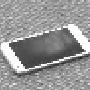

In [5]:
#displaying one image form the yes-mobile
from google.colab.patches import cv2_imshow
img = cv2.imread(yesmobile_path + '/img130.png')
cv2_imshow(img)

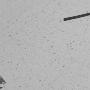

In [6]:
#displaying one image form the no-mobile
from google.colab.patches import cv2_imshow
img = cv2.imread(nomobile_path + '/img10.png')
cv2_imshow(img)

In [7]:
#Reading images from 'yes-mobile' folder and creating labels ( Labels for this class should be 1 )
yesimg = []
y_yes = []

os.chdir('/content/drive/MyDrive/Lab/mobile-images/mobile-images/yes-mobile')

import cv2
for i in os.listdir(yesmobile_path):
  a = cv2.imread(i)
  a = cv2.resize(a,(128,128))
  yesimg.append(a)
  y_yes.append(1)

In [8]:
#Reading images from 'no-mobile' folder and creating labels ( Labels for this class should be 0 )
noimg = []
y_no = []

os.chdir('/content/drive/MyDrive/Lab/mobile-images/mobile-images/no-mobile')

import cv2
for i in os.listdir(nomobile_path):
  a = cv2.imread(i)
  a = cv2.resize(a,(128,128))
  noimg.append(a)
  y_no.append(0)

### Check shape and size of the images

In [9]:
print( yesimg[1].shape)
print(len(yesimg))

(128, 128, 3)
124


In [10]:
print( noimg[1].shape)
print(len(noimg))

(128, 128, 3)
121


###  What is the percentage of images with and without mobile phone in the data

In [11]:
total_img_count = len(yesimg)+len(noimg)
class1_freq = (len(yesimg)/total_img_count)*100
class0_freq = (len(noimg)/total_img_count)*100

In [12]:
print("Class 1 Frequency (%):",class1_freq)
print("Class 0 Frequency (%):",class0_freq)
print("Total no. of images:",total_img_count)

Class 1 Frequency (%): 50.61224489795918
Class 0 Frequency (%): 49.38775510204081
Total no. of images: 245


### Concatenate above two arrays (array having image details of with and without mobile) into one variable and check the final size of the data
### Concatenate lists having label data into one list

In [13]:
X_img = np.concatenate((yesimg,noimg), axis=0)

# Checking  shape and size of data after concatenation

print(X_img.shape)

(245, 128, 128, 3)


In [14]:
Y = np.concatenate((y_yes,y_no), axis=0)

# Checking  shape and size of data after concatenation

print(Y.shape)

(245,)


### Shuffle the above data and labels ( Data and label should be in sync)

In [15]:
from sklearn.utils import shuffle
data, label = shuffle(X_img, Y, random_state = 9)

## 4. Visualize and Standardize the data

### Visualise the first 10 images in the data and print their corresponding labels.

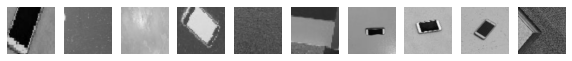

Label for each of the above images is: [1 0 0 1 0 0 1 1 1 0]


In [16]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 1))
for i in range(10):
        plt.subplot(1, 10, i+1)
        plt.imshow(data[i],cmap='gray')
        plt.axis('off')
plt.show()

print('Label for each of the above images is: %s' % (label[0:10]))

### Split the data into train and test

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( data, label, test_size=0.25, random_state=9)

### Print shape of the X train and X test data

In [18]:
print(X_train.shape)
print(X_test.shape)

(183, 128, 128, 3)
(62, 128, 128, 3)


### Normalize the data by dividing by 255

In [19]:
#Normalize the values to appear between 0 and 1

X_train_std = X_train/255.0
X_test_std = X_test/255.0

###  One hot encode the labels for train and test data 
Hint:- We need to one hot encode the labels for the model to understand the labels better. We will be using categorical cross entropy as our loss function and for this purpose we need our labels to be in one hot encoded format.

In [20]:
from tensorflow.keras.utils import to_categorical

y_train_oh = to_categorical(y_train)
y_test_oh = to_categorical(y_test)

print(y_train_oh.shape)
print(y_test_oh.shape)

(183, 2)
(62, 2)


## 5. Model building

### Define the model architecture using TensorFlow with a Conv2D layer followed by dense layers with activation as ReLu and softmax respectively. 

In [21]:
epochs = 30
batch_size = 32
n_classes = 2

In [22]:
import  tensorflow as tf

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = tf.keras.models.Sequential()
model.add(Conv2D(32,(3,3),activation= 'relu', input_shape=(128,128,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(5,5),activation= 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(n_classes,activation= 'softmax'))

### Compile the above model using appropriate loss metric. Try with sgd, adam optimizer and "accuracy" as metrics. 

In [23]:
opt =  tf.keras.optimizers.Adam(lr=1e-3)

In [24]:
model.compile(loss='categorical_crossentropy',optimizer= opt, metrics = ['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 59, 59, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 53824)             0         
_________________________________________________________________
dense (Dense)                (None, 2)                 107650    
Total params: 159,810
Trainable params: 159,810
Non-trainable params: 0
__________________________________________________

### Fit the model on the training dataset along with it's equivalent one hot encoded labels

In [26]:
training_history = model.fit(X_train_std,
                             y_train_oh,
                             validation_data = (X_test_std,y_test_oh), 
                             epochs = epochs , 
                             batch_size=batch_size,
                             verbose=1)

Epoch 1/30
6/6 [==============================] - 4s 121ms/step - loss: 0.8135 - accuracy: 0.6175 - val_loss: 0.6585 - val_accuracy: 0.7581
Epoch 2/30
6/6 [==============================] - 0s 23ms/step - loss: 0.6181 - accuracy: 0.7596 - val_loss: 0.7144 - val_accuracy: 0.5000
Epoch 3/30
6/6 [==============================] - 0s 23ms/step - loss: 0.4606 - accuracy: 0.8306 - val_loss: 0.5311 - val_accuracy: 0.7903
Epoch 4/30
6/6 [==============================] - 0s 23ms/step - loss: 0.3164 - accuracy: 0.8907 - val_loss: 0.4693 - val_accuracy: 0.7903
Epoch 5/30
6/6 [==============================] - 0s 28ms/step - loss: 0.2722 - accuracy: 0.8907 - val_loss: 0.4301 - val_accuracy: 0.7903
Epoch 6/30
6/6 [==============================] - 0s 22ms/step - loss: 0.2223 - accuracy: 0.9235 - val_loss: 0.4961 - val_accuracy: 0.7581
Epoch 7/30
6/6 [==============================] - 0s 23ms/step - loss: 0.1738 - accuracy: 0.9563 - val_loss: 0.4535 - val_accuracy: 0.7581
Epoch 8/30
6/6 [==========

## 6. Evaluate the model


### Evaluate the model on test data and print loss and accuracy

In [27]:
scores = model.evaluate(X_test_std,y_test_oh)
print("Loss:",scores[0])
print("Accuracy:",scores[1])

2/2 [==============================] - 0s 14ms/step - loss: 1.1345 - accuracy: 0.8065
Loss: 1.1344656944274902
Accuracy: 0.8064516186714172


### Predict label data of the test data and check confusion matrix

In [28]:
import numpy as np
y_pred = np.argmax(model.predict(X_test_std),axis = 1)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[22,  4],
       [ 8, 28]])

### Display test images and their predicted label for a few samples

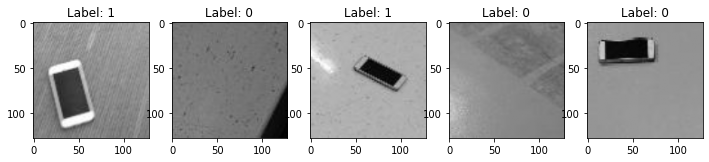

In [29]:
sample = model.predict_classes(X_test_std)

test_pred = X_test_std

def show_pred(show, test_pred,sample):
  fig,axs= plt.subplots(1, show, figsize=(12,8))
  for i in range(0, show):
    axs[i].imshow(test_pred[i],label=sample[i])
    axs[i].set_title('Label: {}'.format(sample[i]))
    
show_pred(5,test_pred, sample)

### Print following plots
1. Plot training accuracy vs validation accuracy
2. Plot training loss vs validation loss

In [30]:
accuracy = training_history.history['accuracy']
val_accuracy = training_history.history['val_accuracy']
loss = training_history.history['loss']
val_loss = training_history.history['val_loss']

<Figure size 432x288 with 0 Axes>

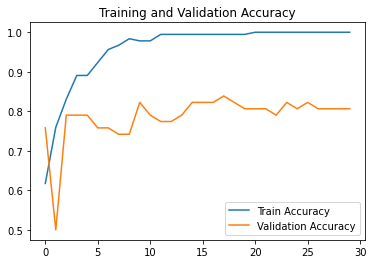

<Figure size 432x288 with 0 Axes>

In [31]:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy,label= 'Train Accuracy')
plt.plot(epochs, val_accuracy,label= 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc='lower right')
plt.figure()

<Figure size 432x288 with 0 Axes>

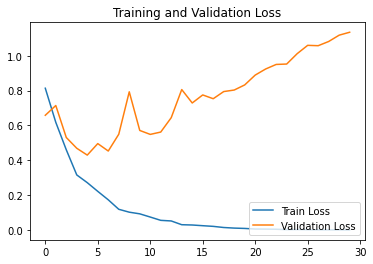

<Figure size 432x288 with 0 Axes>

In [32]:
plt.plot(epochs, loss,label= 'Train Loss')
plt.plot(epochs, val_loss,label= 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(loc='lower right')
plt.figure()

## 7.  Conclusion and Interpretation

### Write your observations and findings

At an very early stage we are going into the overfit zone also the validation accuracy almost remains the same showing there isn't any learning. 
After a certain epochs we can see that train loss is decreasing but the validation loss is increasing showing that we are definitely going into the overfit zone 

## 8. Further Explore

### Try changing a few hyperparameters such as number of layers in the network or number of units in a hidden layer or try different activation functions in the hidden layers and see if you get better results than the previous network

In [33]:
tf.keras.backend.clear_session

<function tensorflow.python.keras.backend.clear_session>

In [34]:
import  tensorflow as tf

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = tf.keras.models.Sequential()
model.add(Conv2D(256,(4,4),activation= 'relu', input_shape=(128,128,3)))
model.add(MaxPooling2D(4,4))
model.add(Conv2D(256,(4,4),activation= 'relu'))
model.add(MaxPooling2D(4,4))
model.add(Conv2D(256,(4,4),activation= 'relu'))
model.add(MaxPooling2D(4,4))
model.add(Flatten())
model.add(Dense(500,activation= 'relu'))
model.add(Dense(125,activation= 'relu'))
model.add(Dense(n_classes,activation= 'softmax'))

In [35]:
opt = tf.keras.optimizers.Adam(lr=1e-3)

In [36]:
model.compile(loss='categorical_crossentropy',optimizer = opt, metrics = ['accuracy'])

In [37]:
training_history = model.fit(X_train_std,
                             y_train_oh,
                             validation_data = (X_test_std,y_test_oh), 
                             epochs = 15 , 
                             batch_size=batch_size,
                             verbose=1)

Epoch 1/15
6/6 [==============================] - 3s 328ms/step - loss: 0.7353 - accuracy: 0.4590 - val_loss: 0.6805 - val_accuracy: 0.7258
Epoch 2/15
6/6 [==============================] - 0s 63ms/step - loss: 0.6580 - accuracy: 0.6831 - val_loss: 0.6935 - val_accuracy: 0.5323
Epoch 3/15
6/6 [==============================] - 0s 66ms/step - loss: 0.5838 - accuracy: 0.7104 - val_loss: 0.6603 - val_accuracy: 0.6290
Epoch 4/15
6/6 [==============================] - 0s 63ms/step - loss: 0.4052 - accuracy: 0.8306 - val_loss: 0.6308 - val_accuracy: 0.7097
Epoch 5/15
6/6 [==============================] - 0s 63ms/step - loss: 0.3874 - accuracy: 0.8525 - val_loss: 0.4335 - val_accuracy: 0.7903
Epoch 6/15
6/6 [==============================] - 0s 62ms/step - loss: 0.2677 - accuracy: 0.8907 - val_loss: 0.3867 - val_accuracy: 0.8065
Epoch 7/15
6/6 [==============================] - 0s 70ms/step - loss: 0.2035 - accuracy: 0.9071 - val_loss: 0.4972 - val_accuracy: 0.8871
Epoch 8/15
6/6 [==========

In [38]:
scores = model.evaluate(X_test_std,y_test_oh)
print("Loss:",scores[0])
print("Accuracy:",scores[1])

2/2 [==============================] - 0s 23ms/step - loss: 0.4372 - accuracy: 0.9032
Loss: 0.4372178912162781
Accuracy: 0.9032257795333862
